In [243]:
import ROOT

# MCFM 
## NLO: 
xsec:             36.2088     +/-            0.390323E-01

## LO:
xsec:             15.2946     +/-            0.779058E-01

Let's look at some quick plots out-of-the-box without normalization.

# SHERPA 

The sherpa sample was generated at pt cut 15-15-15. 

xsec: 108.607

In [244]:
fLO = ROOT.TFile("trigam_lo_cteq6l1_1.00_1.00_13TeV_35.root", "READ")
fNLO = ROOT.TFile("trigam_nlo_CT10.00_1.00_1.00_13TeV_35.root", "READ")

In [245]:
hMgggLO  = fLO.Get("id29")
hMgggNLO = fNLO.Get("id29")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cMggg


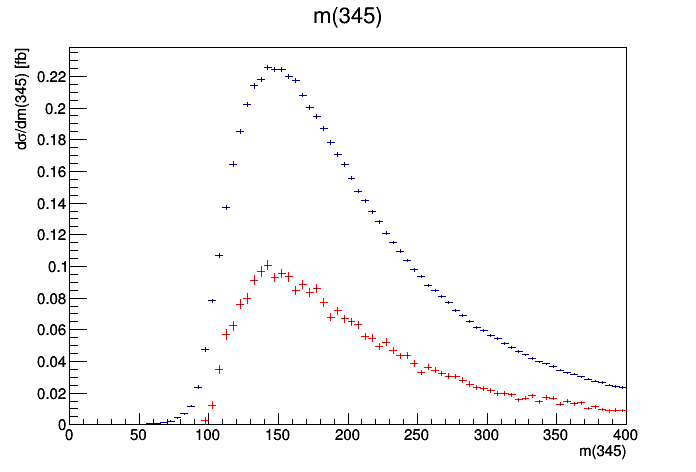

In [246]:
cMggg = ROOT.TCanvas("cMggg")
cMggg.cd()

hMgggNLO.Draw()
hMgggLO.SetLineColor(2)
hMgggLO.Draw("SAME")

cMggg.Draw()

To-do: Let's convert the Sherpa plots into dsigma/dm (differential cross-section) plots and do some proper normalization. 

In [247]:
def convertToDiffXsec(hist, nSimEvents, xsec): 
    xMax = hist.GetXaxis().GetXmax()
    xMin = hist.GetXaxis().GetXmin()
    binWidth = (xMax - xMin)/hist.GetNbinsX()
    
    hist.Scale(1.0/nSimEvents)
    hist.Scale(xsec)
    hist.Scale(1.0/binWidth)
    return hist

Now applying to sherpa

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasMinv


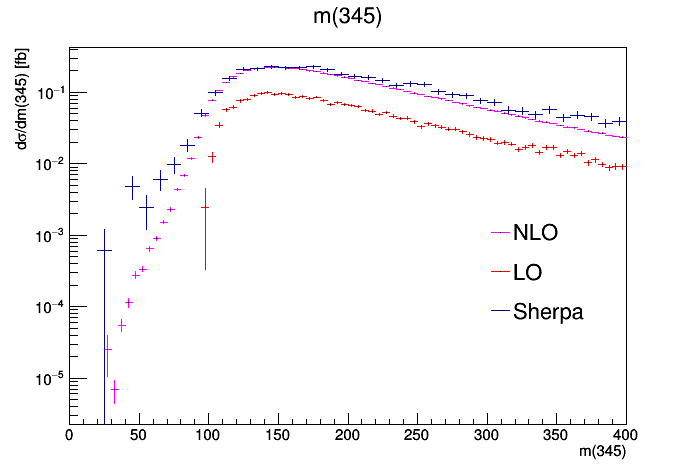

In [248]:
fSherpa = ROOT.TFile("KinematicsHists353515.root", "READ")

hMggg  = fSherpa.Get("h_triphoton_minv") 

xsecSherpa = 108.607
convertToDiffXsec(hMggg, 17800, 108.607)

cMinv = ROOT.TCanvas("canvasMinv")
cMinv.cd()

hMgggNLO.SetLineColor(6)
hMgggNLO.Draw("SAME")
hMggg.Draw("SAME")
hMgggLO.SetLineColor(2)
hMgggLO.Draw("SAME")

cMinv.SetLogy()

legend = ROOT.TLegend(0.7,0.3,0.85,0.55) 
legend.AddEntry(hMgggNLO, "NLO")
legend.AddEntry(hMgggLO, "LO")
legend.AddEntry(hMggg ,"Sherpa")


legend.SetLineWidth(0) 
legend.Draw("same")

cMinv.Draw()

Note that the Sherpa plot is normalized to unit luminosity divided by the binwidth (which for now is a uniform bin width). 

```
hist.Scale(1.0/nSimEvents)
hist.Scale(xsec)      
hist.Scale(1.0/binWidth)
```

Plotting all the other variables: 
KEYS for MCFM:
```
 KEY: TH1F	id1;1	eta3
  KEY: TH1F	id2;1	eta4
  KEY: TH1F	id3;1	eta5
  KEY: TH1F	id4;1	|Deta(3,4)|
  KEY: TH1F	id5;1	|Deta(3,5)|
  KEY: TH1F	id6;1	|Deta(4,5)|
  KEY: TH1F	id7;1	Delta Phi(3,4)
  KEY: TH1F	id8;1	Delta Phi(3,5)
  KEY: TH1F	id9;1	Delta Phi(4,5)
  KEY: TH1F	id10;1	cms phi 1
  KEY: TH1F	id11;1	pt(3)
  KEY: TH1F	id12;1	y(3)
  KEY: TH1F	id13;1	pt(4)
  KEY: TH1F	id14;1	y(4)
  KEY: TH1F	id15;1	pt(5)
  KEY: TH1F	id16;1	y(5)
  KEY: TH1F	id17;1	m(34)
  KEY: TH1F	id18;1	pt(34)
  KEY: TH1F	id19;1	y(34)
  KEY: TH1F	id20;1	|y(34)|
  KEY: TH1F	id21;1	m(35)
  KEY: TH1F	id22;1	pt(35)
  KEY: TH1F	id23;1	y(35)
  KEY: TH1F	id24;1	|y(35)|
  KEY: TH1F	id25;1	m(45)
  KEY: TH1F	id26;1	pt(45)
  KEY: TH1F	id27;1	y(45)
  KEY: TH1F	id28;1	|y(45)|
  KEY: TH1F	id29;1	m(345)
  KEY: TH1F	id30;1	pt(345)
  KEY: TH1F	id31;1	y(345)
 ```
 
 KEYS for Sherpa:
 ```
  KEY: TH1D	h_triphoton_minv;1	Triphoton Minv
  KEY: TH1D	h_diphoton_minv12;1	Triphoton Minv
  KEY: TH1D	h_diphoton_minv13;1	Triphoton Minv
  KEY: TH1D	h_diphoton_minv23;1	Triphoton Minv
 ```

In [249]:
def comp(sherpaKey, MCFMkey, setLogY = False):
    c = ROOT.TCanvas("c")
    c.cd()

    h  = fSherpa.Get(sherpaKey) 
    convertToDiffXsec(h, 17800, 108.607)

    hLO  = fLO.Get(MCFMkey)
    hNLO = fNLO.Get(MCFMkey)

    h.Draw("SAME")
    hNLO.SetLineColor(6)
    hNLO.Draw("SAME")
    hLO.SetLineColor(2)
    hLO.Draw("SAME")

    if setLogY:
        c.SetLogy()

    leg = ROOT.TLegend(0.7,0.3,0.85,0.55) 
    leg.AddEntry(hNLO, "NLO")
    leg.AddEntry(hLO, "LO")
    leg.AddEntry(h,"Sherpa")

    leg.SetLineWidth(0) 
    leg.Draw("same")

    c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


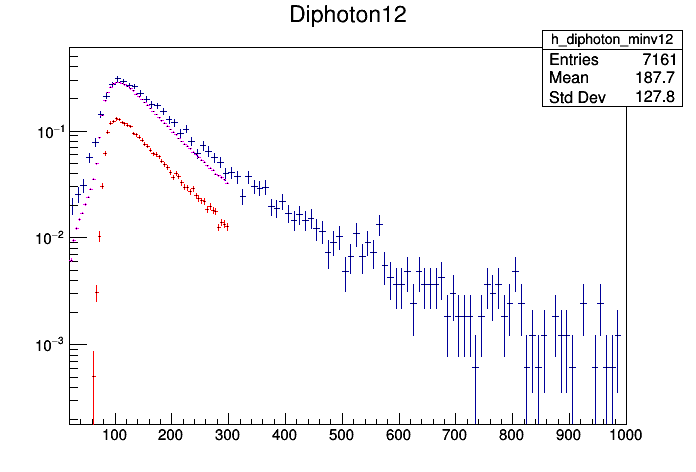

In [250]:
comp("h_diphoton_minv12", "id17", True )

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


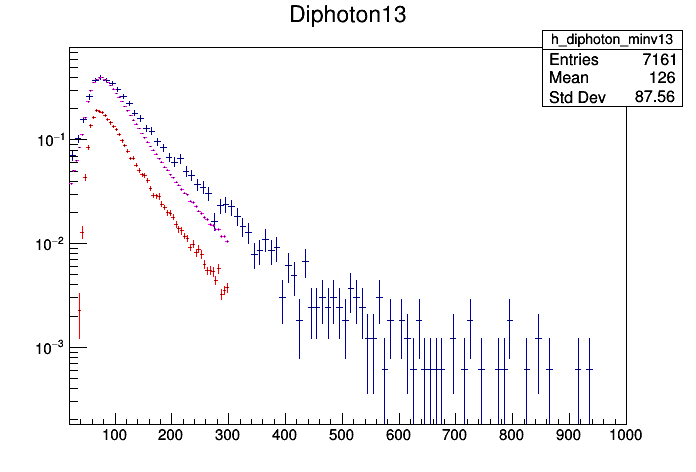

In [251]:
comp("h_diphoton_minv13", "id21", True )

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


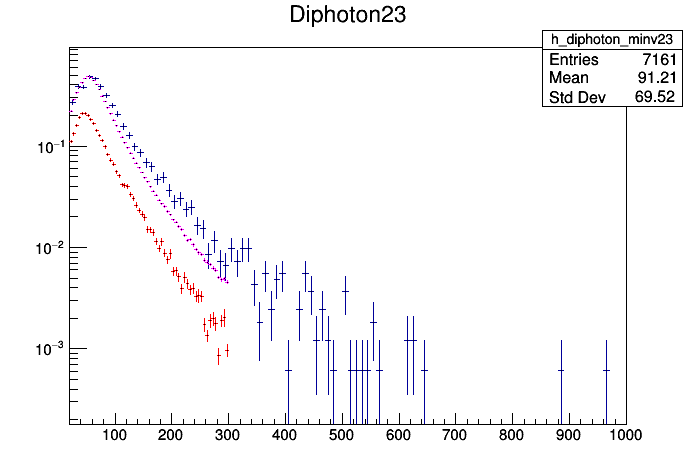

In [252]:
comp("h_diphoton_minv23", "id25", True )

Note: WE'VE FIXED THIS. I deleted the old files and made sure that the files were organized.
We've seen an issue before where the Sherpa peak doesn't match to the MCFM Peak. I thought we already fixed this?
I am redoing the mcfm. See e-log.

LO - looks ok
NLO - ? need to export OMP_STACKSIZE=16000. The program usually crashes when calculating some of the more complicated processes. Adjusting the OMP_STACKSIZE is needed. 

The usual time it takes to perform NLO calculations less than 30 minutes. 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


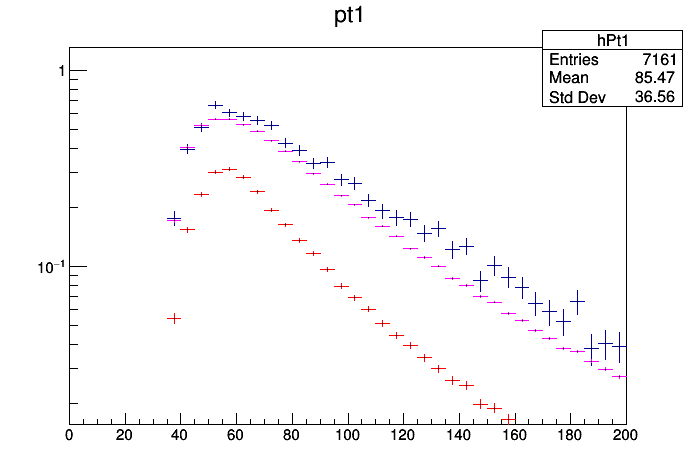

In [253]:
comp("hPt1", "id11", True )

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


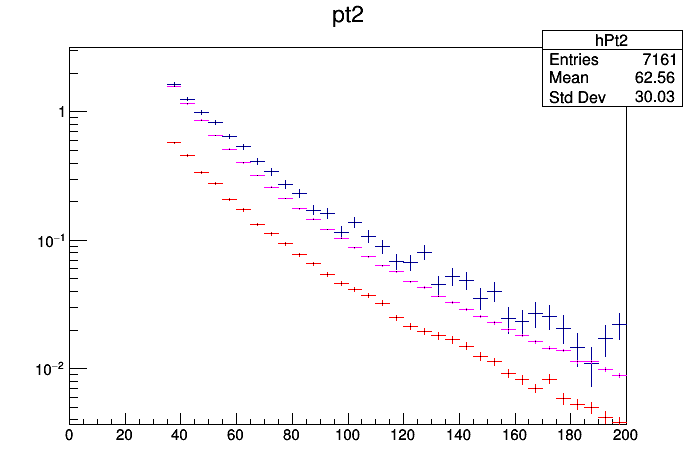

In [254]:
comp("hPt2", "id13", True )

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


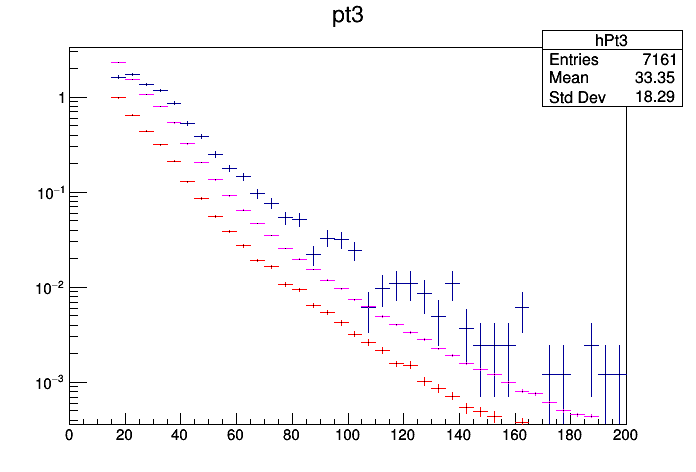

In [255]:
comp("hPt3", "id15", True )

I'm not sure why the peaks of pt1 and pt3 don't match exactly

# Photon Pair Angular Quantities 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


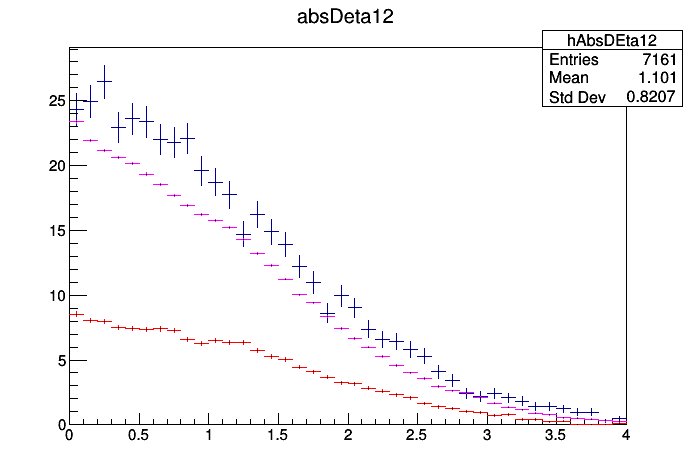

In [256]:
comp("hAbsDEta12", "id4", False)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


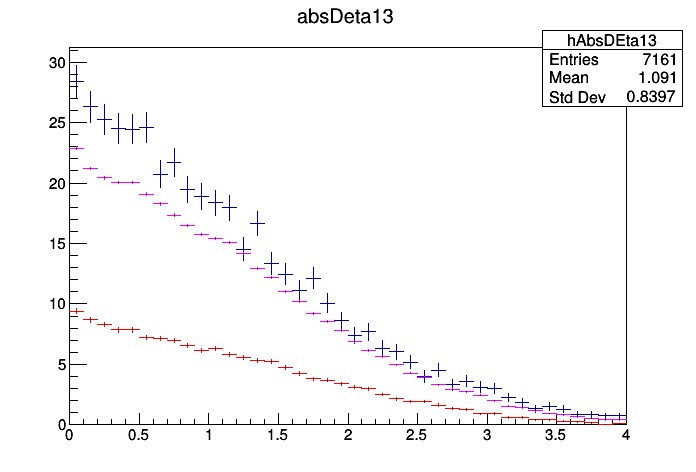

In [257]:
comp("hAbsDEta13", "id5", False)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


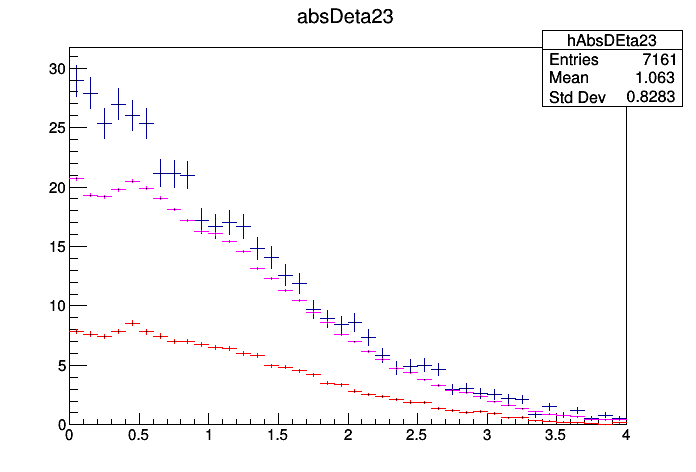

In [258]:
comp("hAbsDEta23", "id6", False)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


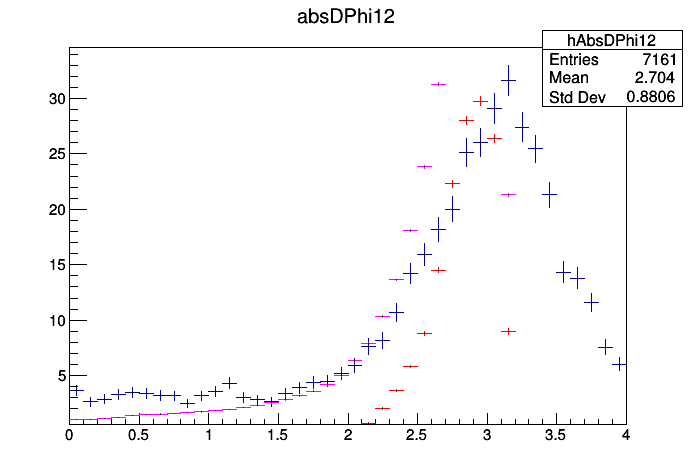

In [259]:
comp("hAbsDPhi12", "id7", False)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


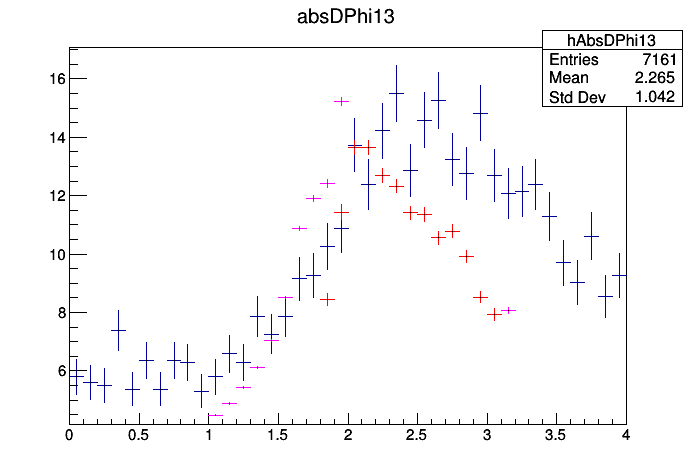

In [261]:
comp("hAbsDPhi13", "id8", False)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


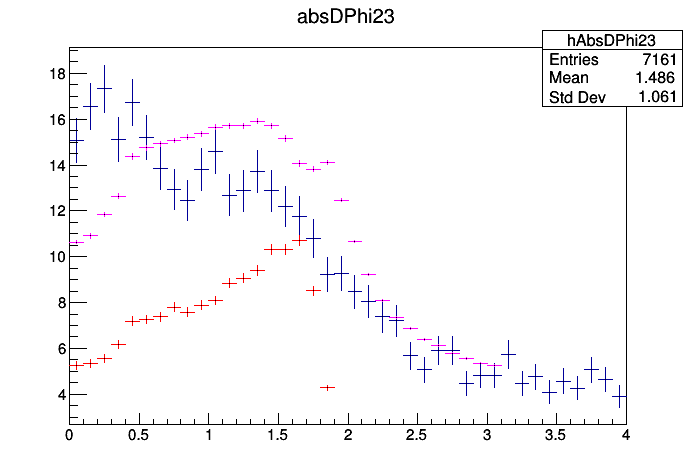

In [262]:
comp("hAbsDPhi23", "id9", False)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


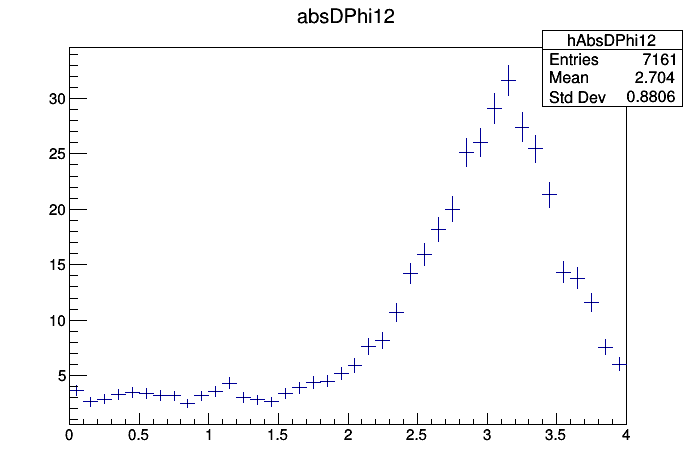

In [260]:
f = ROOT.TFile("KinematicsHists353515.root", "READ")
c = ROOT.TCanvas("c")
c.cd()

h  = f.Get('hAbsDPhi12') 
convertToDiffXsec(h, 17800, 108.607)
   
h.Draw("SAME")
   
#c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


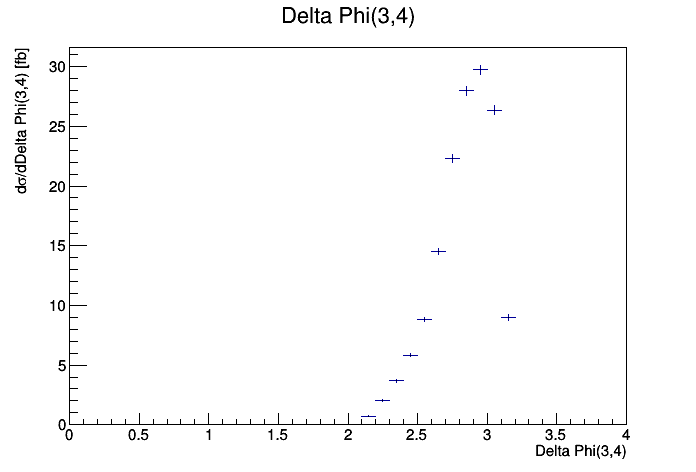

In [241]:
f = ROOT.TFile("trigam_lo_cteq6l1_1.00_1.00_13TeV_35.root", "READ")
c = ROOT.TCanvas("c")
c.cd()

h  = f.Get('id7') 
   
h.Draw("SAME")
   
#c.SetLogy()
c.Draw()

In [ ]:
f = ROOT.TFile("trigam_lo_cteq6l1_1.00_1.00_13TeV_35.root", "READ")
c = ROOT.TCanvas("c")
c.cd()

h  = f.Get('id7') 
   
h.Draw("SAME")
   
#c.SetLogy()
c.Draw()


To-do (August 25): Quickly look at all the other variables and plot the comparisons

Other logs: 

Note: WE'VE FIXED THIS. I deleted the old files and made sure that the files were organized.
We've seen an issue before where the Sherpa peak doesn't match to the MCFM Peak. I thought we already fixed this?
I am redoing the mcfm. See e-log.

LO - looks ok
NLO - ? need to export OMP_STACKSIZE=16000. The program usually crashes when calculating some of the more complicated processes. Adjusting the OMP_STACKSIZE is needed. 

The usual time it takes to perform NLO calculations less than 30 minutes. 